In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import math

from utils.functions import *

%load_ext autoreload
%autoreload 2

[ 0.30081287  1.3137515  -0.6697679  -0.50697956  0.62187932 -0.27966934
 -0.79626648]


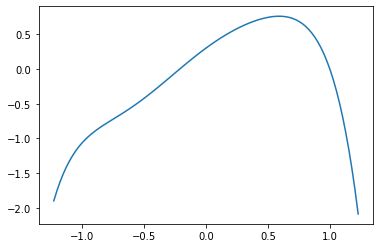

In [3]:
f_deg = 6

mu, sigma = 0, 1 # mean and standard deviation
f = np.random.normal(mu, sigma, f_deg  + 1)

print(f)

def plot_f(f, x_array):
    y_array = np.zeros(len(x_array))
    for deg in range(len(f)):
        y_array += f[deg] * (x_array ** deg)
        
    plt.plot(x_array, y_array)

x_array = (np.array(range(1,100)) - 50)/40
plot_f(f, x_array)

# 1. Before adding Gaussian Noise

## 1.1. Berrut Approximation Encoding

Input:  [[ 0.1466319  -0.8640454 ]
 [ 0.57735465 -0.62913586]
 [ 0.74909736  0.93658025]
 [-0.8257519  -0.14786623]
 [-0.2492681  -0.02572036]
 [-0.33549645 -0.31377404]] 

j:  [0.26179939 0.78539816 1.30899694 1.83259571 2.35619449 2.87979327] 

alpha_array:  [ 0.96592583  0.70710678  0.25881905 -0.25881905 -0.70710678 -0.96592583] 

z_array:  [ 1.          0.9781476   0.91354546  0.80901699  0.66913061  0.5
  0.30901699  0.10452846 -0.10452846 -0.30901699 -0.5        -0.66913061
 -0.80901699 -0.91354546 -0.9781476 ] 

@BACC_Enc: N,K, m_i= 15 6 1 

shape of X_tilde=  (15, 1, 2)


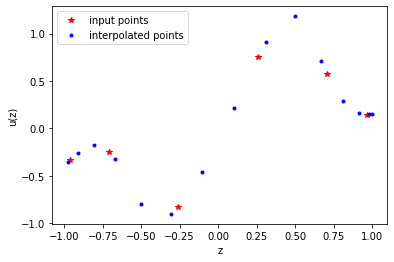

In [9]:
N=15
K= 6
d = 2
m = 6

input_array = np.random.uniform(low=-1.0, high=1.0, size=(m,d))

print("Input: ",input_array,'\n')

j_array = np.array(range(K))
print("j: ",(2*j_array+1)*math.pi/2/K,'\n')

alpha_array = np.cos((2*j_array+1)*math.pi/(2*K)) #np.cos((2*j_array+1)*math.pi/(2*K))
print("alpha_array: ",alpha_array,'\n')

i_array = np.array(range(N))
z_array = np.cos(i_array*2*math.pi/N/2) # np.cos(i_array*2*math.pi/N/2)
print("z_array: ",z_array,'\n')




    
X_tilde = BACC_Enc(input_array, alpha_array, z_array)

print('shape of X_tilde= ',np.shape(X_tilde))

# check Encoding
plt.plot(alpha_array, input_array[:,0],'r*',label='input points')
plt.plot(z_array, X_tilde[:,0,0],'b.',label='interpolated points')
plt.xlabel('z')
plt.ylabel('u(z)')
plt.legend()
plt.show()

## 1.2. Local computation

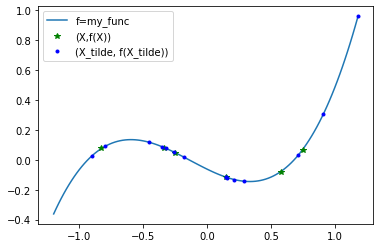

In [110]:
def my_func(inputs):
    outputs = np.zeros(len(inputs))
    
    for i in range(len(inputs)):
        x = inputs[i]
        outputs[i] = - 0.2* x * np.cos(x) + 0.6*(x-0.55)*(x+0.25)*(x+0.75)
    return outputs

my_inputs = (np.array(range(120))-60)/50
my_outputs = my_func(my_inputs)

X_array = input_array[:,0]
Y_array = my_func(X_array)

Y_tilde = my_func(X_tilde[:,0,0])

plt.plot(my_inputs, my_outputs, label='f=my_func')
plt.plot(X_array, Y_array, 'g*', label='(X,f(X))')
plt.plot(X_tilde[:,0,0], Y_tilde, 'b.', label='(X_tilde, f(X_tilde))')
plt.legend()
plt.show()

## 1.3. BACC decoding

(15, 1, 1)
Number of received results = 15 (out of 15)


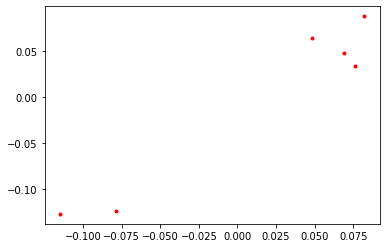

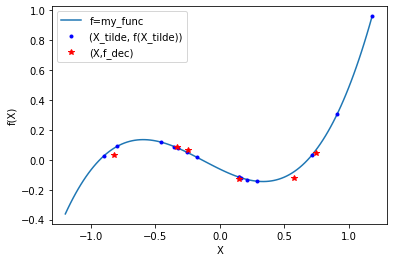

Number of received results = 10 (out of 15)


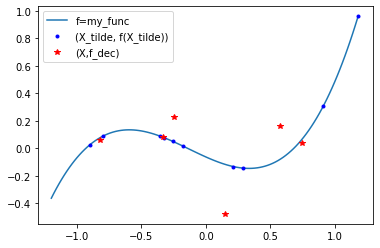

Number of received results = 6 (out of 15)
[ 9 14 11  2 13  3]
[-0.90086731 -0.35558506 -0.32422803  0.16063809 -0.25848153  0.29197076]


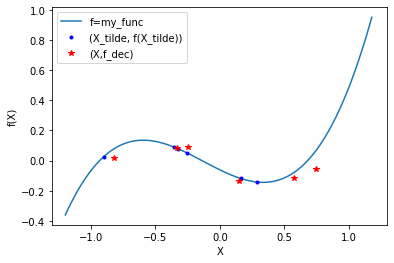

[ 0.16063809  0.29197076 -0.90086731 -0.32422803 -0.25848153 -0.35558506]


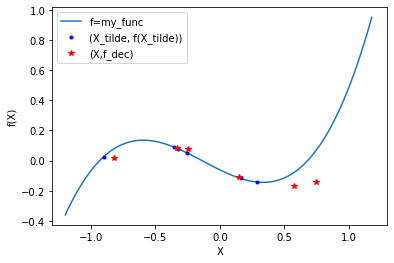

In [34]:
f_tilde = Y_tilde
f_tilde = np.reshape(f_tilde,(N,1,1))
print(np.shape(f_tilde))


print("Number of received results = 15 (out of 15)")
f_dec = BACC_Dec(f_tilde, alpha_array, z_array)
# print(f_dec)
# print(Y_array)

plt.plot(Y_array, np.reshape(f_dec,K), 'r.')
plt.show()

plt.plot(my_inputs, my_outputs, label='f=my_func')
plt.plot(X_tilde[:,0,0], Y_tilde, 'b.', label='(X_tilde, f(X_tilde))')
plt.plot(X_array, np.reshape(f_dec,K), 'r*', label='(X,f_dec)')
plt.legend()
plt.xlabel('X')
plt.ylabel('f(X)')
plt.xlim([-1.3,1.3])
plt.show()

print("Number of received results = 10 (out of 15)")
idxs_users = np.random.choice(range(N), 10, replace=False)
f_dec = BACC_Dec(f_tilde[idxs_users,:,:], alpha_array, z_array[idxs_users])
# print(f_dec)
# print(Y_array)


plt.plot(my_inputs, my_outputs, label='f=my_func')
plt.plot(X_tilde[idxs_users,0,0], Y_tilde[idxs_users], 'b.', label='(X_tilde, f(X_tilde))')
plt.plot(X_array, np.reshape(f_dec,K), 'r*', label='(X,f_dec)')
plt.legend()
plt.xlim([-1.3,1.3])
plt.show()

print("Number of received results = 6 (out of 15)")
idxs_users = np.random.choice(range(N), 6, replace=False)
# idxs_users = [10,3,1,7,9,5]
print(idxs_users)
print(X_tilde[idxs_users,0,0])
f_dec = BACC_Dec(f_tilde[idxs_users,:,:], alpha_array, z_array[idxs_users])
# print(f_dec)
# print(Y_array)


plt.plot(my_inputs, my_outputs, label='f=my_func')
plt.plot(X_tilde[idxs_users,0,0], Y_tilde[idxs_users], 'b.', label='(X_tilde, f(X_tilde))')
plt.plot(X_array, np.reshape(f_dec,K), 'r*', label='(X,f_dec)')
plt.xlim([-1.3,1.3])
plt.xlabel('X')
plt.ylabel('f(X)')
plt.legend()
plt.show()

idxs_users = np.sort(idxs_users)
print(X_tilde[idxs_users,0,0])
f_dec = BACC_Dec(f_tilde[idxs_users,:,:], alpha_array, z_array[idxs_users])
# print(f_dec)
# print(Y_array)

plt.plot(my_inputs, my_outputs, label='f=my_func')
plt.plot(X_tilde[idxs_users,0,0], Y_tilde[idxs_users], 'b.', label='(X_tilde, f(X_tilde))')
plt.plot(X_array, np.reshape(f_dec,K), 'r*', label='(X,f_dec)')
plt.xlim([-1.3,1.3])
plt.xlabel('X')
plt.ylabel('f(X)')
plt.legend()
plt.show()

## 1.4 Interpret the BACC enc/dec with f(x) = - 0.2* x * np.cos(x) + 0.6*(x-0.55)*(x+0.25)*(x+0.75)

@BACC_Enc: N,K, m_i= 1000 6 1 

@BACC_Enc: N,K, m_i= 15 6 1 



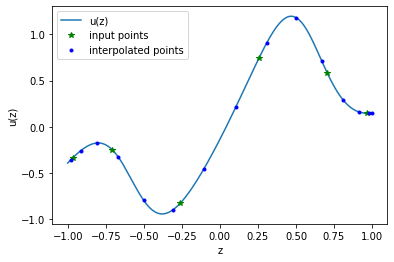

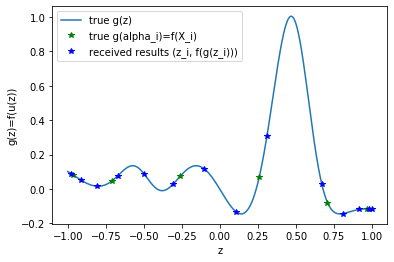

Number of received results = 15 (out of 15)
selected index: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


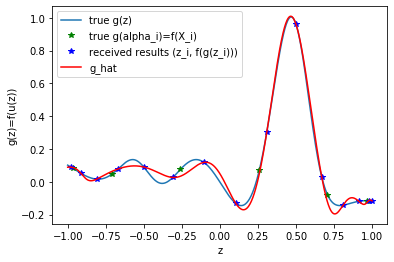

Number of received results = 6 (out of 15)
selected index: [ 3  1  6  7  9 11]


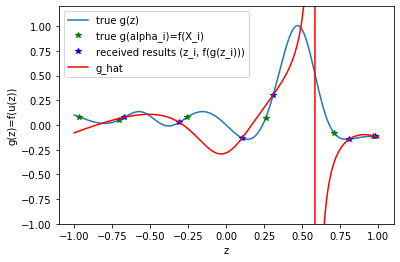

Number of received results = 6 (out of 15)
selected index: [ 1  3  6  7  9 11]


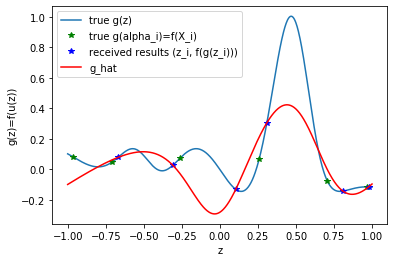

Number of received results = 5
selected index: [ 4  5  7 13 14]


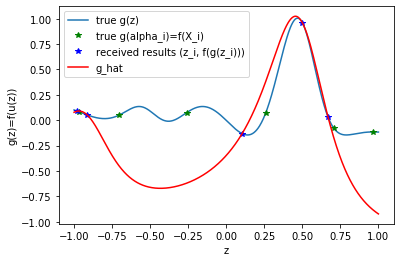

Number of received results = 6
selected index: [ 0  2  6  8  9 14]


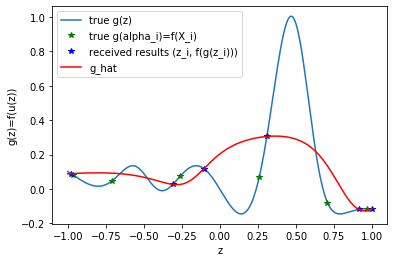

Number of received results = 7
selected index: [ 0  3  5  6  7  9 11]


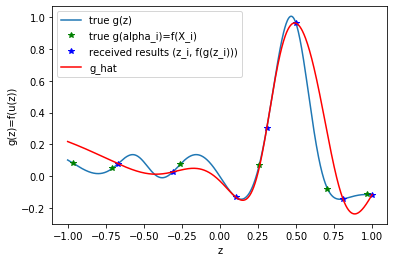

Number of received results = 8
selected index: [ 0  1  5  6  8  9 10 13]


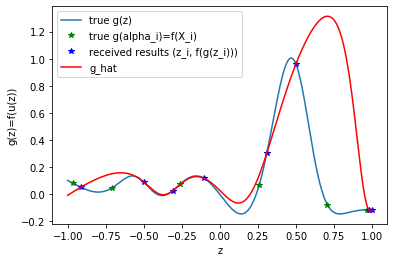

Number of received results = 9
selected index: [ 1  3  4  5  6  7  9 10 11]


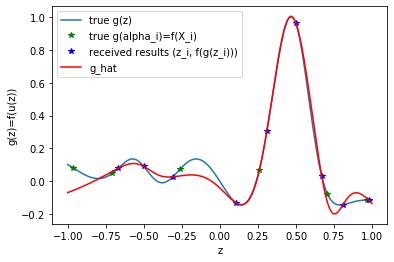

Number of received results = 10
selected index: [ 0  1  3  4  6  7  8 10 12 13]


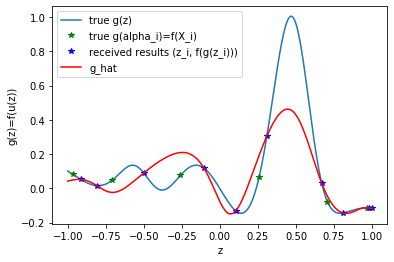

Number of received results = 11
selected index: [ 1  2  3  4  6  9 10 11 12 13 14]


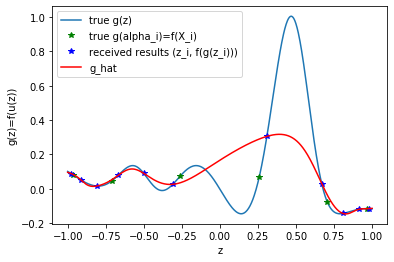

Number of received results = 12
selected index: [ 0  1  3  4  5  6  8  9 11 12 13 14]


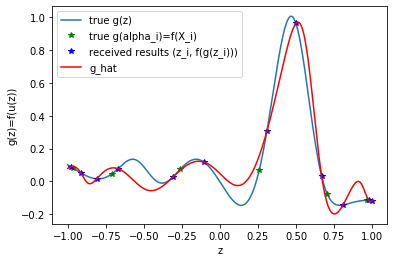

Number of received results = 13
selected index: [ 0  1  2  3  5  6  7  8  9 10 11 12 13]


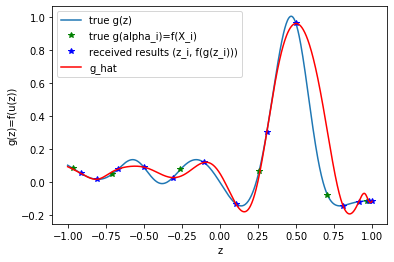

Number of received results = 14
selected index: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14]


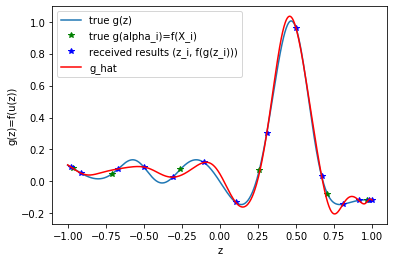

In [118]:
def my_func(inputs):
    outputs = np.zeros(len(inputs))
    
    for i in range(len(inputs)):
        x = inputs[i]
        outputs[i] = - 0.2* x * np.cos(x) + 0.6*(x-0.55)*(x+0.25)*(x+0.75)
    return outputs

my_inputs = (np.array(range(120))-60)/50
my_outputs = my_func(my_inputs)

X_array = input_array[:,0]
Y_array = my_func(X_array)

Y_tilde = my_func(X_tilde[:,0,0])

f_tilde = Y_tilde
f_tilde = np.reshape(f_tilde,(N,1,1))

K_=1000

j_array_ = np.array(range(K_))
alpha_array_ = np.cos((2*j_array_+1)*math.pi/(2*K_)) #np.cos((2*j_array+1)*math.pi/(2*K))
alpha_idx = np.argsort(alpha_array_)
# print(alpha_array_[alpha_idx])

X_tilde_ = BACC_Enc(input_array, alpha_array, alpha_array_)
Y_tilde_ = my_func(X_tilde_[:,0,0])

X_tilde = BACC_Enc(input_array, alpha_array, z_array)

plt.plot(alpha_array_,X_tilde_[:,0,0], label='u(z)')
plt.plot(alpha_array,input_array[:,0],'g*', label='input points')
plt.plot(z_array, X_tilde[:,0,0],'b.',label='interpolated points')
plt.xlabel('z')
plt.ylabel('u(z)')
plt.legend()
plt.show()

f_dec_ = BACC_Dec(f_tilde[idxs_users,:,:], alpha_array_, z_array[idxs_users])
plt.plot(alpha_array_[alpha_idx],Y_tilde_[alpha_idx],label='true g(z)')
plt.plot(alpha_array,Y_array,'g*',label='true g(alpha_i)=f(X_i)')
plt.plot(z_array[idxs_users],f_tilde[idxs_users,0,0],'b*', label='received results (z_i, f(g(z_i)))')
# plt.plot(alpha_array_[alpha_idx],f_dec_[alpha_idx,0,0],'r', label='g_hat')
plt.xlabel('z')
plt.ylabel('g(z)=f(u(z))')
plt.legend()
plt.show()

print("Number of received results = 15 (out of 15)")
idxs_users = np.random.choice(range(N), 15, replace=False)
idxs_users = np.sort(idxs_users)
print("selected index:", idxs_users)

f_dec_ = BACC_Dec(f_tilde[idxs_users,:,:], alpha_array_, z_array[idxs_users])
plt.plot(alpha_array_[alpha_idx],Y_tilde_[alpha_idx],label='true g(z)')
plt.plot(alpha_array,Y_array,'g*',label='true g(alpha_i)=f(X_i)')
plt.plot(z_array[idxs_users],f_tilde[idxs_users,0,0],'b*', label='received results (z_i, f(g(z_i)))')
plt.plot(alpha_array_[alpha_idx],f_dec_[alpha_idx,0,0],'r', label='g_hat')
plt.xlabel('z')
plt.ylabel('g(z)=f(u(z))')
plt.legend()
plt.show()

print("Number of received results = 6 (out of 15)")
# idxs_users = np.random.choice(range(N), 6, replace=False)
idxs_users = np.array([3,  1, 6,  7,  9,  11])
print("selected index:", idxs_users)

f_dec_ = BACC_Dec(f_tilde[idxs_users,:,:], alpha_array_, z_array[idxs_users])
plt.plot(alpha_array_[alpha_idx],Y_tilde_[alpha_idx],label='true g(z)')
plt.plot(alpha_array,Y_array,'g*',label='true g(alpha_i)=f(X_i)')
plt.plot(z_array[idxs_users],f_tilde[idxs_users,0,0],'b*', label='received results (z_i, f(g(z_i)))')
plt.plot(alpha_array_[alpha_idx],f_dec_[alpha_idx,0,0],'r', label='g_hat')
plt.xlabel('z')
plt.ylabel('g(z)=f(u(z))')
plt.ylim([-1,1.2])
plt.legend()
plt.show()

print("Number of received results = 6 (out of 15)")
idxs_users = np.sort(idxs_users)
print("selected index:", idxs_users)

f_dec_ = BACC_Dec(f_tilde[idxs_users,:,:], alpha_array_, z_array[idxs_users])
plt.plot(alpha_array_[alpha_idx],Y_tilde_[alpha_idx],label='true g(z)')
plt.plot(alpha_array,Y_array,'g*',label='true g(alpha_i)=f(X_i)')
plt.plot(z_array[idxs_users],f_tilde[idxs_users,0,0],'b*', label='received results (z_i, f(g(z_i)))')
plt.plot(alpha_array_[alpha_idx],f_dec_[alpha_idx,0,0],'r', label='g_hat')
plt.xlabel('z')
plt.ylabel('g(z)=f(u(z))')
plt.legend()
plt.show()


for n in range(5,15):
    print("Number of received results =",n)
    idxs_users = np.random.choice(range(N), n, replace=False)
    idxs_users = np.sort(idxs_users)
    print("selected index:", idxs_users)

    f_dec_ = BACC_Dec(f_tilde[idxs_users,:,:], alpha_array_, z_array[idxs_users])
    plt.plot(alpha_array_[alpha_idx],Y_tilde_[alpha_idx],label='true g(z)')
    plt.plot(alpha_array,Y_array,'g*',label='true g(alpha_i)=f(X_i)')
    plt.plot(z_array[idxs_users],f_tilde[idxs_users,0,0],'b*', label='received results (z_i, f(g(z_i)))')
    plt.plot(alpha_array_[alpha_idx],f_dec_[alpha_idx,0,0],'r', label='g_hat')
    plt.xlabel('z')
    plt.ylabel('g(z)=f(u(z))')
    plt.legend()
    plt.show()

## 1.5 Interpret the BACC enc/dec with f(x) = 0.5*x - 0.1

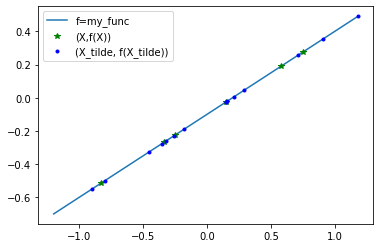

@BACC_Enc: N,K, m_i= 1000 6 1 



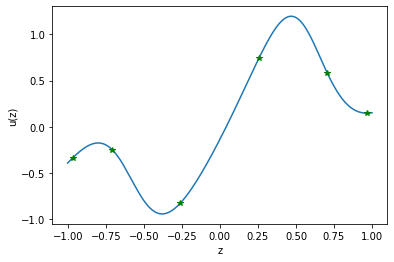

Number of received results = 15 (out of 15)
selected index: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


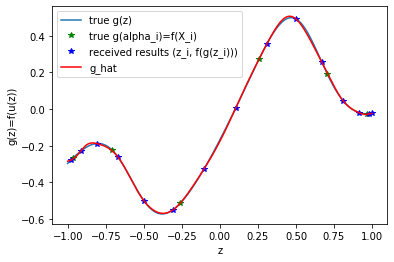

Number of received results = 6 (out of 15)
selected index: [ 6  3 11  1  7  9]


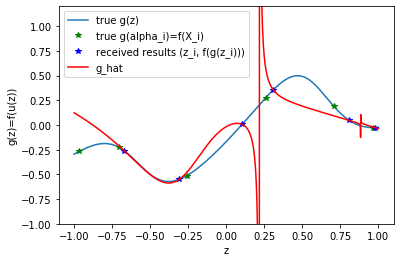

Number of received results = 6 (out of 15)
selected index: [ 1  3  6  7  9 11]


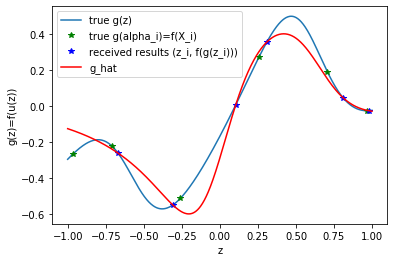

In [77]:
def my_func(inputs):
    outputs = np.zeros(len(inputs))
    
    for i in range(len(inputs)):
        x = inputs[i]
        outputs[i] =  0.5 * x - 0.1
    return outputs

my_inputs = (np.array(range(120))-60)/50
my_outputs = my_func(my_inputs)

X_array = input_array[:,0]
Y_array = my_func(X_array)

Y_tilde = my_func(X_tilde[:,0,0])

f_tilde = Y_tilde
f_tilde = np.reshape(f_tilde,(N,1,1))

plt.plot(my_inputs, my_outputs, label='f=my_func')
plt.plot(X_array, Y_array, 'g*', label='(X,f(X))')
plt.plot(X_tilde[:,0,0], Y_tilde, 'b.', label='(X_tilde, f(X_tilde))')
plt.legend()
plt.show()

K_=1000

j_array_ = np.array(range(K_))
alpha_array_ = np.cos((2*j_array_+1)*math.pi/(2*K_)) #np.cos((2*j_array+1)*math.pi/(2*K))
alpha_idx = np.argsort(alpha_array_)
# print(alpha_array_[alpha_idx])

X_tilde_ = BACC_Enc(input_array, alpha_array, alpha_array_)
Y_tilde_ = my_func(X_tilde_[:,0,0])

plt.plot(alpha_array_,X_tilde_[:,0,0])
plt.plot(alpha_array,input_array[:,0],'g*')
plt.xlabel('z')
plt.ylabel('u(z)')
plt.show()

print("Number of received results = 15 (out of 15)")
idxs_users = np.random.choice(range(N), 15, replace=False)
idxs_users = np.sort(idxs_users)
print("selected index:", idxs_users)

f_dec_ = BACC_Dec(f_tilde[idxs_users,:,:], alpha_array_, z_array[idxs_users])
plt.plot(alpha_array_[alpha_idx],Y_tilde_[alpha_idx],label='true g(z)')
plt.plot(alpha_array,Y_array,'g*',label='true g(alpha_i)=f(X_i)')
plt.plot(z_array[idxs_users],f_tilde[idxs_users,0,0],'b*', label='received results (z_i, f(g(z_i)))')
plt.plot(alpha_array_[alpha_idx],f_dec_[alpha_idx,0,0],'r', label='g_hat')
plt.xlabel('z')
plt.ylabel('g(z)=f(u(z))')
plt.legend()
plt.show()

print("Number of received results = 6 (out of 15)")
# idxs_users = np.random.choice(range(N), 6, replace=False)
idxs_users = np.array([6,  3, 11,  1,  7,  9])
print("selected index:", idxs_users)

f_dec_ = BACC_Dec(f_tilde[idxs_users,:,:], alpha_array_, z_array[idxs_users])
plt.plot(alpha_array_[alpha_idx],Y_tilde_[alpha_idx],label='true g(z)')
plt.plot(alpha_array,Y_array,'g*',label='true g(alpha_i)=f(X_i)')
plt.plot(z_array[idxs_users],f_tilde[idxs_users,0,0],'b*', label='received results (z_i, f(g(z_i)))')
plt.plot(alpha_array_[alpha_idx],f_dec_[alpha_idx,0,0],'r', label='g_hat')
plt.xlabel('z')
plt.ylabel('g(z)=f(u(z))')
plt.ylim([-1,1.2])
plt.legend()
plt.show()

print("Number of received results = 6 (out of 15)")
idxs_users = np.sort(idxs_users)
print("selected index:", idxs_users)

f_dec_ = BACC_Dec(f_tilde[idxs_users,:,:], alpha_array_, z_array[idxs_users])
plt.plot(alpha_array_[alpha_idx],Y_tilde_[alpha_idx],label='true g(z)')
plt.plot(alpha_array,Y_array,'g*',label='true g(alpha_i)=f(X_i)')
plt.plot(z_array[idxs_users],f_tilde[idxs_users,0,0],'b*', label='received results (z_i, f(g(z_i)))')
plt.plot(alpha_array_[alpha_idx],f_dec_[alpha_idx,0,0],'r', label='g_hat')
plt.xlabel('z')
plt.ylabel('g(z)=f(u(z))')
plt.legend()
plt.show()

# 2. BACC with MNIST dataset

# 2.1. Encoding

In [89]:
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import copy
import numpy as np
from torchvision import datasets, transforms
import torch

from utils.sampling import mnist_iid, mnist_noniid, cifar_iid
from utils.options import args_parser
from models.Update import LocalUpdate
from models.Nets import MLP, CNNMnist, CNNCifar, LeNet, CNNMnist2
from models.Fed import FedAvg
from models.Fed import FedQAvg, Quantization, Quantization_Finite, my_score, my_score_Finite
from models.test import test_img
from torch.utils.data import DataLoader, Dataset

%load_ext autoreload
%autoreload 2

class DatasetSplit(Dataset):
    def __init__(self, dataset, idxs):
        self.dataset = dataset
        self.idxs = list(idxs)

    def __len__(self):
        return len(self.idxs)

    def __getitem__(self, item):
        image, label = self.dataset[self.idxs[item]]
        return image, label

class my_argument:    
    epochs = 200    #"rounds of training"
    num_users = 15  # "number of users: N"
    num_partition = 6 # "number of users: K"
    frac = 0.5 #"the fraction of clients: C"
    local_ep = 1 #"the number of local epochs: E"
    local_bs = 200 #"local batch size: B"
    bs=200 #"test batch size"
    lr=0.01 #"learning rate"
    momentum=0.5 # "SGD momentum (default: 0.5)"
    split='user' # "train-test split type, user or sample"
    opt='ADAM'
    loss='Custom' # 'Custom' or 'Default'

    # model arguments
    model = 'cnn'
    kernel_num=9 #, help='number of each kind of kernel')
    kernel_sizes='3,4,5' #  help='comma-separated kernel size to use for convolution')
    norm='None' #, help="batch_norm, layer_norm, or None")
    num_filters=32 #, help="number of filters for conv nets")
    max_pool='True' #help="Whether use max pooling rather than strided convolutions")

    # other arguments
    dataset='mnist' #, help="name of dataset")
    iid=1
    num_classes=10#, help="number of classes")
    num_channels=1#, help="number of channels of imges")
    gpu=1#, help="GPU ID, -1 for CPU")
    stopping_rounds=10#, help='rounds of early stopping')
    verbose='False'#, help='verbose print')
    seed=1#, help='random seed (default: 1)')
    
args = my_argument()

args.device = torch.device('cuda:{}'.format(args.gpu) if torch.cuda.is_available() and args.gpu != -1 else 'cpu')

# load dataset and split users
trans_mnist = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
dataset_train = datasets.MNIST('../data/mnist/', train=True, download=True, transform=trans_mnist)
dataset_test = datasets.MNIST('../data/mnist/', train=False, download=True, transform=trans_mnist)

dict_users = mnist_iid(dataset_train, args.num_partition)

encoding_input_array_np = np.empty((len(dataset_train),28*28))
encoding_label_array_np = np.empty((len(dataset_train),args.num_classes))
print("size of X:" ,encoding_input_array_np.shape)
print("size of Y:" ,encoding_label_array_np.shape)

Size_submatrices = int(60000/args.num_partition)

for i in range(args.num_partition):
    
    stt_pos = i*Size_submatrices
    end_pos = (i+1)*Size_submatrices
#     print(i,stt_pos,end_pos)
    Temp_train = DataLoader(DatasetSplit(dataset_train, dict_users[i]), batch_size=Size_submatrices, shuffle=True)
    
    for batch_idx, (images, labels) in enumerate(Temp_train):
        
        images_np = images.detach().cpu().numpy()
        encoding_input_array_np[stt_pos:end_pos,:] = np.reshape(images_np, (Size_submatrices,28*28))
#         print(encoding_input_array_np[stt_pos:end_pos,:].shape)

        onehot_labels = torch.nn.functional.one_hot(labels,num_classes=args.num_classes)
        labels_np = onehot_labels.detach().cpu().numpy()
#         print(labels_np.shape)
        encoding_label_array_np[stt_pos:end_pos,:] = labels_np


# print(labels_np[0:10,:])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
size of X: (60000, 784)
size of Y: (60000, 10)


In [90]:
from utils.functions import *
import math

N= args.num_users
K= args.num_partition


j_array = np.array(range(K))
# print("j: ",(2*j_array+1)*math.pi/2/K,'\n')

alpha_array = np.cos((2*j_array+1)*math.pi/(2*K)) #np.cos((2*j_array+1)*math.pi/(2*K))
print("alpha_array: ",alpha_array,'\n')

i_array = np.array(range(N))
z_array = np.cos(i_array*2*math.pi/N/2) # np.cos(i_array*2*math.pi/N/2)
print("z_array: ",z_array,'\n')

X_tilde = BACC_Enc(encoding_input_array_np, alpha_array, z_array)
y_tilde = BACC_Enc(encoding_label_array_np, alpha_array, z_array)

alpha_array:  [ 0.96592583  0.70710678  0.25881905 -0.25881905 -0.70710678 -0.96592583] 

z_array:  [ 1.          0.9781476   0.91354546  0.80901699  0.66913061  0.5
  0.30901699  0.10452846 -0.10452846 -0.30901699 -0.5        -0.66913061
 -0.80901699 -0.91354546 -0.9781476 ] 

@BACC_Enc: N,K, m_i= 15 6 10000 

@BACC_Enc: N,K, m_i= 15 6 10000 



In [91]:
print(encoding_input_array_np.shape)
print(X_tilde.shape)


(60000, 784)
(15, 10000, 784)


# 2.2. Input images & labels

label= [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


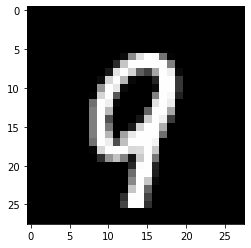

label= [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


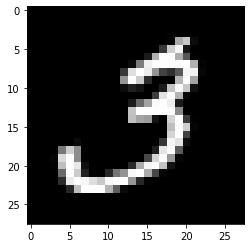

label= [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


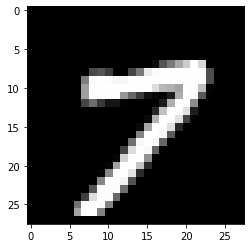

label= [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


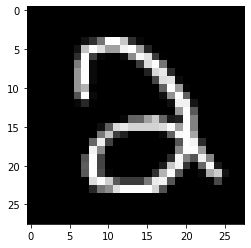

label= [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


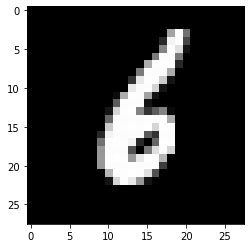

label= [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


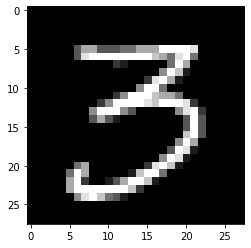

In [102]:
index_num = 3

index_sel = np.array(range(K))*Size_submatrices + index_num
# print(index_sel)

input_images = encoding_input_array_np[index_sel,:]
input_labels = encoding_label_array_np[index_sel,:]
for i in range(len(index_sel)):
    print('label=',input_labels[i,:])
    pixels = input_images[i,:].reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

## 2.3. Encoded Images & Labels

(15, 10000, 784)
(15, 10000, 10)
(15, 784)
label= [ 0.     0.    -0.03  -0.148  0.     0.     0.022  0.051  0.     1.105]


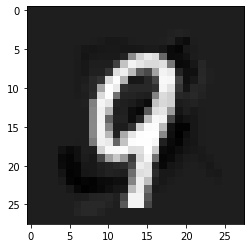

label= [ 0.     0.    -0.01  -0.053  0.     0.     0.008  0.018  0.     1.038]


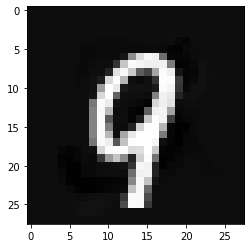

label= [ 0.     0.     0.037  0.232  0.     0.    -0.027 -0.066  0.     0.824]


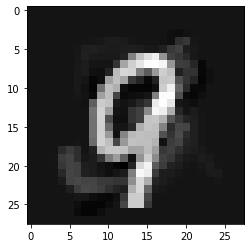

label= [ 0.     0.     0.062  0.682  0.     0.    -0.043 -0.12   0.     0.419]


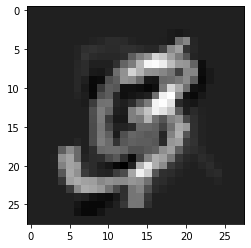

label= [ 0.     0.    -0.044  1.053  0.     0.     0.03   0.1    0.    -0.138]


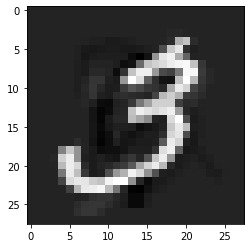

label= [ 0.     0.    -0.233  0.733  0.     0.     0.146  0.733  0.    -0.379]


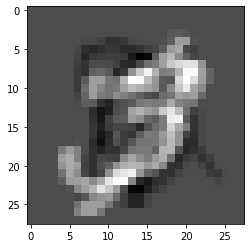

label= [ 0.     0.    -0.091  0.089  0.     0.     0.051  1.03   0.    -0.079]


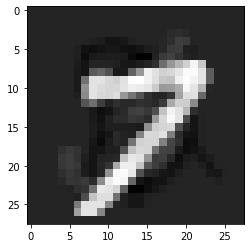

label= [ 0.     0.     0.326 -0.086  0.     0.    -0.146  0.768  0.     0.138]


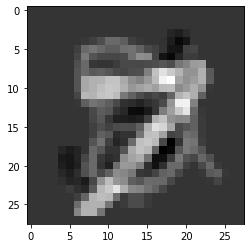

label= [ 0.     0.     0.768 -0.008  0.     0.    -0.197  0.326  0.     0.111]


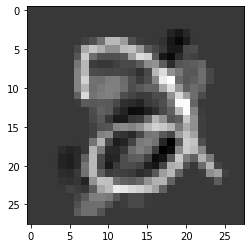

label= [ 0.     0.     1.03  -0.028  0.     0.     0.13  -0.091  0.    -0.041]


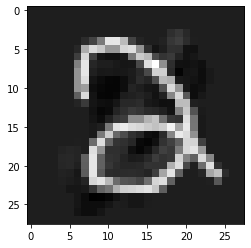

label= [ 0.     0.     0.733 -0.233  0.     0.     0.854 -0.233  0.    -0.121]


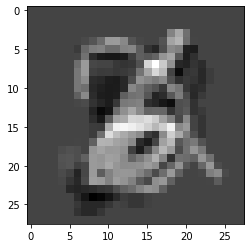

label= [ 0.     0.     0.1   -0.108  0.     0.     1.078 -0.044  0.    -0.025]


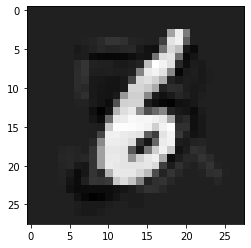

label= [ 0.     0.    -0.12   0.376  0.     0.     0.645  0.062  0.     0.037]


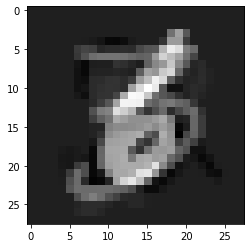

label= [ 0.     0.    -0.066  0.797  0.     0.     0.209  0.037  0.     0.023]


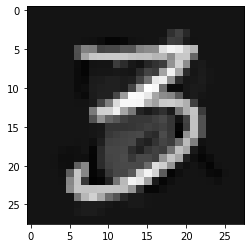

label= [ 0.     0.     0.018  1.046  0.     0.    -0.047 -0.01   0.    -0.007]


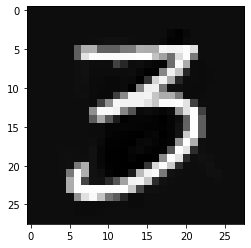

In [105]:
print(X_tilde.shape)
print(y_tilde.shape)
encoded_images = X_tilde[:,index_num,:]
encoded_labels = y_tilde[:,index_num,:]
print(encoded_images.shape)
np.set_printoptions(precision=3)

for i in range(encoded_images.shape[0]):
    print('label=', encoded_labels[i,:])
    pixels = encoded_images[i,:].reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()